<a href="https://colab.research.google.com/github/ChrisDieck/Project-2/blob/main/Identifying_Introverts_and_Extroverts_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Normalizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
filename = '/content/drive/MyDrive/07 Week 7: Classification Models/Week 7 Data/iedata - data.csv'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = pd.read_csv(filename)
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,Q43A,Q43I,Q43E,Q44A,Q44I,Q44E,Q45A,Q45I,Q45E,Q46A,Q46I,Q46E,Q47A,Q47I,Q47E,Q48A,Q48I,Q48E,Q49A,Q49I,Q49E,Q50A,Q50I,Q50E,Q51A,Q51I,Q51E,Q52A,Q52I,Q52E,Q53A,Q53I,Q53E,Q54A,Q54I,Q54E,Q55A,Q55I,Q55E,Q56A,Q56I,Q56E,Q57A,Q57I,Q57E,Q58A,Q58I,Q58E,Q59A,Q59I,Q59E,Q60A,Q60I,Q60E,Q61A,Q61I,Q61E,Q62A,Q62I,Q62E,Q63A,Q63I,Q63E,Q64A,Q64I,Q64E,Q65A,Q65I,Q65E,Q66A,Q66I,Q66E,Q67A,Q67I,Q67E,Q68A,Q68I,Q68E,Q69A,Q69I,Q69E,Q70A,Q70I,Q70E,Q71A,Q71I,Q71E,Q72A,Q72I,Q72E,Q73A,Q73I,Q73E,Q74A,Q74I,Q74E,Q75A,Q75I,Q75E,Q76A,Q76I,Q76E,Q77A,Q77I,Q77E,Q78A,Q78I,Q78E,Q79A,Q79I,Q79E,Q80A,Q80I,Q80E,Q81A,Q81I,Q81E,Q82A,Q82I,Q82E,Q83A,Q83I,Q83E,Q84A,Q84I,Q84E,Q85A,Q85I,Q85E,Q86A,Q86I,Q86E,Q87A,Q87I,Q87E,Q88A,Q88I,Q88E,Q89A,Q89I,Q89E,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,country,dateload,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,66,5365,3,74,6646,2,23,2726,3,11,10188,3,15,5676,4,48,5759,5,13,6928,1,63,2703,5,55,2822,3,21,6659,5,72,2739,1,86,2859,3,49,3466,3,27,3761,4,90,4171,1,76,2842,4,22,2284,1,69,3479,3,28,3538,5,14,2499,1,71,4909,4,75,2407,5,64,2519,5,9,3050,4,7,3627,1,79,2462,2,77,4298,2,20,3775,2,31,4420,4,81,4486,5,29,5112,4,89,4049,2,19,4813,1,80,2638,1,3,15520,5,36,3411,2,65,5463,5,53,3897,4,2,37013,5,57,2753,5,42,6252,1,44,6666,5,82,2598,2,5,6670,4,78,3106,5,37,2051,3,84,4828,1,46,3162,1,62,2459,5,24,3714,3,1,9726,1,85,2827,4,38,5207,4,6,12885,5,8,4046,2,41,4981,4,50,10778,1,83,1588,2,32,6312,2,26,7265,1,59,3193,3,70,985,1,43,6652,4,73,2387,1,87,3483,1,16,8420,5,30,3131,1,54,4073,5,10,5381,3,34,3689,2,17,2922,5,33,2167,5,45,2935,3,52,2199,5,88,3456,3,39,2946,4,25,6926,2,18,8118,1,61,2446,3,47,2115,2,68,3423,1,58,2496,4,12,3674,2,60,7304,5,67,883,4,4,11548,3,40,4648,3,35,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,3,8563,2,75,4027,2,79,2885,5,54,6215,2,84,5548,1,71,3909,3,25,17651,2,89,9559,2,68,6294,3,8,3979,3,50,3992,2,34,6224,2,30,2758,4,49,4101,5,69,1879,2,20,4274,2,10,3130,4,82,5492,4,61,2152,3,83,3084,5,22,4203,5,27,2308,5,45,3326,1,21,4298,5,53,2922,2,14,8051,2,16,6387,3,44,8956,5,59,6885,2,18,3175,2,6,10890,4,78,2799,5,9,6509,4,41,3784,4,60,5494,3,85,6630,3,63,6690,1,24,3318,3,56,6025,4,66,6349,1,48,6339,1,5,6991,4,72,4904,2,57,3754,2,87,5432,4,43,3539,2,17,6645,2,64,3359,1,37,10660,1,32,4552,1,91,4742,3,86,744,1,40,3473,2,31,8298,1,23,5833,3,38,5701,1,4,7062,1,65,3666,4,36,3970,5,55,4203,1,67,5337,5,33,5477,1,11,1998,1,26,2803,1,51,2074,1,15,3449,5,70,2260,1,52,3365,5,81,4950,3,58,2471,2,29,4544,5,74,2415,2,42,4891,4,62,2829,2,35,8469,5,73,3853,4,46,4980,2,76,5906,1,7,2456,2,19,12717,2,88,2749,2,77,2181,1,47,1820,3,2,9578,4,80,5095,4,90,2827,4,28,3884,3,1,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,80,3822,4,21,4338,5,68,2359,5,42,2435,5,16,1681,5,82,3219,5,81,2561,4,90,8847,5,9,2343,4,1,2690,1,43,2404,1,62,3471,1,86,2645,1,66,2052,1,88,1492,2,38,3273,1,5,4524,3,58,4257,2,18,3052,5,26,2227,4,3,6735,4,4,4404,4,51,6024,5,84,2290,2,77,2304,4,56,3685,5,53,3192,4,23,2702,5,34,4022,2,28,2880,2,85,5301,3,50,2462,5,70,5312,1,91,2978,4,49,5375,2,78,4255,4,24,8229,4,48,2183,4,76,3614,5,71,3872,5,47,2216,5,14,3942,4,79,4239,3,27,3969,1,20,3935,1,61,1845,5,11,3495,5,89,3274,5,8,2259,4,37,2020,3,72,8238,5,74,2562,4,15,2484,5,31,3475,4,75,3313,5,60,2087,4,64,3626,5,22,1737,3,36,4630,2,57,5828,5,45,2926,2,83,4026,5,52,1664,1,73,2830,4,10,2328,1,33,2260,5,67

In [ ]:
df.shape

(7188, 282)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Columns: 282 entries, Q1A to IE
dtypes: int64(280), object(2)
memory usage: 15.5+ MB


In [ ]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,Q43A,Q43I,Q43E,Q44A,Q44I,Q44E,Q45A,Q45I,Q45E,Q46A,Q46I,Q46E,Q47A,Q47I,Q47E,Q48A,Q48I,Q48E,Q49A,Q49I,Q49E,Q50A,Q50I,Q50E,Q51A,Q51I,Q51E,Q52A,Q52I,Q52E,Q53A,Q53I,Q53E,Q54A,Q54I,Q54E,Q55A,Q55I,Q55E,Q56A,Q56I,Q56E,Q57A,Q57I,Q57E,Q58A,Q58I,Q58E,Q59A,Q59I,Q59E,Q60A,Q60I,Q60E,Q61A,Q61I,Q61E,Q62A,Q62I,Q62E,Q63A,Q63I,Q63E,Q64A,Q64I,Q64E,Q65A,Q65I,Q65E,Q66A,Q66I,Q66E,Q67A,Q67I,Q67E,Q68A,Q68I,Q68E,Q69A,Q69I,Q69E,Q70A,Q70I,Q70E,Q71A,Q71I,Q71E,Q72A,Q72I,Q72E,Q73A,Q73I,Q73E,Q74A,Q74I,Q74E,Q75A,Q75I,Q75E,Q76A,Q76I,Q76E,Q77A,Q77I,Q77E,Q78A,Q78I,Q78E,Q79A,Q79I,Q79E,Q80A,Q80I,Q80E,Q81A,Q81I,Q81E,Q82A,Q82I,Q82E,Q83A,Q83I,Q83E,Q84A,Q84I,Q84E,Q85A,Q85I,Q85E,Q86A,Q86I,Q86E,Q87A,Q87I,Q87E,Q88A,Q88I,Q88E,Q89A,Q89I,Q89E,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
count,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,7188.00000,71

# Dropping Unnecessary Columns

In [ ]:
df = df.drop(columns=['testelapse','surveyelapse','introelapse','dateload'])

These columns were dropped because the time it took people to answer questions and the time that people spent with the intro and final page open should not matter. Also, the data may not even be accurate to how long the person actually spent since they could have left their computer.

In [ ]:
#changing 'IE' to 'target' for later step
df = df.rename(columns={'IE':'target'})
df.head(2)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,Q43A,Q43I,Q43E,Q44A,Q44I,Q44E,Q45A,Q45I,Q45E,Q46A,Q46I,Q46E,Q47A,Q47I,Q47E,Q48A,Q48I,Q48E,Q49A,Q49I,Q49E,Q50A,Q50I,Q50E,Q51A,Q51I,Q51E,Q52A,Q52I,Q52E,Q53A,Q53I,Q53E,Q54A,Q54I,Q54E,Q55A,Q55I,Q55E,Q56A,Q56I,Q56E,Q57A,Q57I,Q57E,Q58A,Q58I,Q58E,Q59A,Q59I,Q59E,Q60A,Q60I,Q60E,Q61A,Q61I,Q61E,Q62A,Q62I,Q62E,Q63A,Q63I,Q63E,Q64A,Q64I,Q64E,Q65A,Q65I,Q65E,Q66A,Q66I,Q66E,Q67A,Q67I,Q67E,Q68A,Q68I,Q68E,Q69A,Q69I,Q69E,Q70A,Q70I,Q70E,Q71A,Q71I,Q71E,Q72A,Q72I,Q72E,Q73A,Q73I,Q73E,Q74A,Q74I,Q74E,Q75A,Q75I,Q75E,Q76A,Q76I,Q76E,Q77A,Q77I,Q77E,Q78A,Q78I,Q78E,Q79A,Q79I,Q79E,Q80A,Q80I,Q80E,Q81A,Q81I,Q81E,Q82A,Q82I,Q82E,Q83A,Q83I,Q83E,Q84A,Q84I,Q84E,Q85A,Q85I,Q85E,Q86A,Q86I,Q86E,Q87A,Q87I,Q87E,Q88A,Q88I,Q88E,Q89A,Q89I,Q89E,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,country,gender,engnat,age,target
0,5,51,7107,3,91,2522,1,56,6180,2,66,5365,3,74,6646,2,23,2726,3,11,10188,3,15,5676,4,48,5759,5,13,6928,1,63,2703,5,55,2822,3,21,6659,5,72,2739,1,86,2859,3,49,3466,3,27,3761,4,90,4171,1,76,2842,4,22,2284,1,69,3479,3,28,3538,5,14,2499,1,71,4909,4,75,2407,5,64,2519,5,9,3050,4,7,3627,1,79,2462,2,77,4298,2,20,3775,2,31,4420,4,81,4486,5,29,5112,4,89,4049,2,19,4813,1,80,2638,1,3,15520,5,36,3411,2,65,5463,5,53,3897,4,2,37013,5,57,2753,5,42,6252,1,44,6666,5,82,2598,2,5,6670,4,78,3106,5,37,2051,3,84,4828,1,46,3162,1,62,2459,5,24,3714,3,1,9726,1,85,2827,4,38,5207,4,6,12885,5,8,4046,2,41,4981,4,50,10778,1,83,1588,2,32,6312,2,26,7265,1,59,3193,3,70,985,1,43,6652,4,73,2387,1,87,3483,1,16,8420,5,30,3131,1,54,4073,5,10,5381,3,34,3689,2,17,2922,5,33,2167,5,45,2935,3,52,2199,5,88,3456,3,39,2946,4,25,6926,2,18,8118,1,61,2446,3,47,2115,2,68,3423,1,58,2496,4,12,3674,2,60,7304,5,67,883,4,4,11548,3,40,4648,3,35,4609,US,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,3,8563,2,75,4027,2,79,2885,5,54,6215,2,84,5548,1,71,3909,3,25,17651,2,89,9559,2,68,6294,3,8,3979,3,50,3992,2,34,6224,2,30,2758,4,49,4101,5,69,1879,2,20,4274,2,10,3130,4,82,5492,4,61,2152,3,83,3084,5,22,4203,5,27,2308,5,45,3326,1,21,4298,5,53,2922,2,14,8051,2,16,6387,3,44,8956,5,59,6885,2,18,3175,2,6,10890,4,78,2799,5,9,6509,4,41,3784,4,60,5494,3,85,6630,3,63,6690,1,24,3318,3,56,6025,4,66,6349,1,48,6339,1,5,6991,4,72,4904,2,57,3754,2,87,5432,4,43,3539,2,17,6645,2,64,3359,1,37,10660,1,32,4552,1,91,4742,3,86,744,1,40,3473,2,31,8298,1,23,5833,3,38,5701,1,4,7062,1,65,3666,4,36,3970,5,55,4203,1,67,5337,5,33,5477,1,11,1998,1,26,2803,1,51,2074,1,15,3449,5,70,2260,1,52,3365,5,81,4950,3,58,2471,2,29,4544,5,74,2415,2,42,4891,4,62,2829,2,35,8469,5,73,3853,4,46,4980,2,76,5906,1,7,2456,2,19,12717,2,88,2749,2,77,2181,1,47,1820,3,2,9578,4,80,5095,4,90,2827,4,28,3884,3,1,10409,AU,1,2,25,2


In [ ]:
#Removing the 'QI' and 'QE' columns because the information does not seem very useful since there
#are many things that can skew the data.
df = df.drop(df.filter(regex='I').columns, axis=1)
df = df.drop(df.filter(regex='E').columns, axis=1)

In [ ]:
df.head(2)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,country,gender,engnat,age,target
0,5,3,1,2,3,2,3,3,4,5,1,5,3,5,1,3,3,4,1,4,1,3,5,1,4,5,5,4,1,2,2,2,4,5,4,2,1,1,5,2,5,4,5,5,1,5,2,4,5,3,1,1,5,3,1,4,4,5,2,4,1,2,2,1,3,1,4,1,1,5,1,5,3,2,5,5,3,5,3,4,2,1,3,2,1,4,2,5,4,3,3,US,2,1,23,3
1,5,5,1,5,2,2,5,2,1,3,2,2,3,3,2,2,4,5,2,2,4,4,3,5,5,5,1,5,2,2,3,5,2,2,4,5,4,4,3,3,1,3,4,1,1,4,2,2,4,2,2,1,1,1,3,1,2,1,3,1,1,4,5,1,5,1,1,1,1,5,1,5,3,2,5,2,4,2,5,4,2,1,2,2,2,1,3,4,4,4,3,AU,1,2,25,2


In [ ]:
#changing 'target' back to 'IE' now that the filter was used to remove the other columns containing 'I' and 'E'
df = df.rename(columns={'target':'IE'})

# Handling Missing Values and Duplicates

In [ ]:
df.duplicated().sum()

0

There are no duplicated values.

In [ ]:
#checking for total amount of null values
df.isna().sum().sum()

2

In [ ]:
#seeing which columns contain null values since df.info was not showing
df.loc[:, df.isna().any()]

,country
0,US
1,AU
2,BR
3,CZ
4,CA
...,...
7183,US
7184,CA
7185,BY
7186,CA


In [ ]:
#checking to see what the two rows are in the country column
country_filter = df['country'].isna()
df.loc[country_filter, :].head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,country,gender,engnat,age,IE
3820,5,1,2,1,2,4,5,3,1,3,4,2,5,1,2,5,5,5,5,5,2,5,5,2,4,5,5,5,1,1,5,5,5,5,2,2,1,2,5,5,5,5,2,4,5,5,5,1,5,5,2,2,1,5,1,4,4,2,5,1,1,2,2,1,4,2,2,1,1,5,1,1,2,1,5,4,5,4,5,5,1,1,2,2,2,1,4,5,5,5,5,NaN,2,1,17,2
7015,5,3,2,1,5,5,5,3,2,5,5,5,2,1,1,3,5,5,2,5,3,1,4,1,5,4,5,4,2,5,5,2,3,5,3,2,2,5,5,2,5,1,5,5,5,5,1,4,5,1,2,5,5,5,5,5,3,1,3,1,1,5,1,5,5,1,2,1,1,4,1,3,4,1,5,4,5,2,3,1,5,4,4,2,4,1,1,5,3,4,1,NaN,2,2,15,3


In [ ]:
#checking which country is the most frequent value
df['country'].value_counts()

US      3417
GB       517
CA       448
AU       323
DE       193
NONE     185
IN       150
PH       127
ID       109
PL        91
BR        91
RO        77
MY        76
NL        74
NZ        70
FR        68
SE        65
FI        63
SG        62
IT        58
RU        48
PT        41
ES        38
NO        35
IE        34
MX        32
ZA        31
GR        27
DK        26
TR        26
CZ        26
RS        25
BE        24
AR        24
HR        23
CH        22
HU        21
NG        19
LT        19
PK        17
JP        16
AT        16
KE        16
UA        15
HK        15
TH        14
SI        13
BG        13
VN        13
CN        10
IL        10
AE         9
SK         9
LB         8
KR         8
CO         8
CL         8
BY         8
PY         7
GE         7
MA         6
DZ         5
TW         5
SA         5
TT         5
AL         5
JM         5
BA         5
CR         5
EE         4
MK         4
EC         4
PE         4
LV         3
MD         3
EG         3
VE         3

In [ ]:
#decided to fill the missing values with 'US' because it is most likely the US
df['country'].fillna('US', inplace=True)

In [ ]:
#checking results
df.isna().sum().sum()

0

There are no more missing values

In [ ]:
df.head(2)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,country,gender,engnat,age,IE
0,5,3,1,2,3,2,3,3,4,5,1,5,3,5,1,3,3,4,1,4,1,3,5,1,4,5,5,4,1,2,2,2,4,5,4,2,1,1,5,2,5,4,5,5,1,5,2,4,5,3,1,1,5,3,1,4,4,5,2,4,1,2,2,1,3,1,4,1,1,5,1,5,3,2,5,5,3,5,3,4,2,1,3,2,1,4,2,5,4,3,3,US,2,1,23,3
1,5,5,1,5,2,2,5,2,1,3,2,2,3,3,2,2,4,5,2,2,4,4,3,5,5,5,1,5,2,2,3,5,2,2,4,5,4,4,3,3,1,3,4,1,1,4,2,2,4,2,2,1,1,1,3,1,2,1,3,1,1,4,5,1,5,1,1,1,1,5,1,5,3,2,5,2,4,2,5,4,2,1,2,2,2,1,3,4,4,4,3,AU,1,2,25,2


# Fixing Odd Values in Age Column

In [ ]:
df['age'].value_counts()

18         626
17         533
16         470
20         465
19         458
21         433
22         355
23         322
24         285
15         278
25         251
26         208
27         175
28         174
30         174
14         156
29         137
34         108
31         107
33         101
32          99
35          87
36          73
38          72
39          66
37          63
40          61
42          55
45          53
50          51
41          46
43          43
44          41
48          38
46          37
51          37
47          36
52          36
55          32
49          31
54          30
53          29
57          29
56          28
59          20
65          18
58          18
64          17
62          17
61          16
66          15
60          13
67           9
69           9
63           7
72           6
70           6
71           5
68           3
78           2
1990         2
77           2
79           2
1983         1
1999         1
1979         1
90        

## For all of the values that look like they were input as a year, I subtracted that number from 2019 (the year the data was collected) to get the correct age.

In [ ]:
df.index[df['age'] == 2003].tolist()

[4043]

In [ ]:
df.loc[4043,['age']] = 16

In [ ]:
df.index[df['age'] == 1990].tolist()

[1302, 4682]

In [ ]:
df.loc[1302,['age']] = 29

In [ ]:
df.loc[4682,['age']] = 29

In [ ]:
df.index[df['age'] == 1983].tolist()

[4179]

In [ ]:
df.loc[4179,['age']] = 36

In [ ]:
df.index[df['age'] == 1999].tolist()

[6856]

In [ ]:
df.loc[6856,['age']] = 20

In [ ]:
df.index[df['age'] == 1979].tolist()

[5470]

In [ ]:
df.loc[5470,['age']] = 40

In [ ]:
df.index[df['age'] == 1991].tolist()

[2902]

In [ ]:
df.loc[2902,['age']] = 28

In [ ]:
df.index[df['age'] == 1996].tolist()

[6943]

In [ ]:
df.loc[6943,['age']] = 23

## I assumed the super large number was a dishonest answer, so I dropped the entire row. I also changed '255' to '25' because I think it may have been a typo.

In [ ]:
#finding odd value index
df.index[df['age'] == 8675309].tolist()

[3834]

In [ ]:
#dropping entire row
df.drop([3834], inplace=True)

In [ ]:
#finding odd value index
df.index[df['age'] == 255].tolist()

[1772]

In [ ]:
#changing value to 25
df.loc[1772,['age']] = 25

In [ ]:
df['age'].value_counts()

18    626
17    533
16    471
20    466
19    458
21    433
22    355
23    323
24    285
15    278
25    252
26    208
27    175
28    175
30    174
14    156
29    139
34    108
31    107
33    101
32     99
35     87
36     74
38     72
39     66
37     63
40     62
42     55
45     53
50     51
41     46
43     43
44     41
48     38
51     37
46     37
52     36
47     36
55     32
49     31
54     30
53     29
57     29
56     28
59     20
58     18
65     18
62     17
64     17
61     16
66     15
60     13
69      9
67      9
63      7
72      6
70      6
71      5
68      3
79      2
77      2
78      2
81      1
75      1
73      1
90      1
Name: age, dtype: int64

# Data Exploration

## Univariate Exploratory Visuals

In [ ]:
df.head(2)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,country,gender,engnat,age,IE
0,5,3,1,2,3,2,3,3,4,5,1,5,3,5,1,3,3,4,1,4,1,3,5,1,4,5,5,4,1,2,2,2,4,5,4,2,1,1,5,2,5,4,5,5,1,5,2,4,5,3,1,1,5,3,1,4,4,5,2,4,1,2,2,1,3,1,4,1,1,5,1,5,3,2,5,5,3,5,3,4,2,1,3,2,1,4,2,5,4,3,3,US,2,1,23,3
1,5,5,1,5,2,2,5,2,1,3,2,2,3,3,2,2,4,5,2,2,4,4,3,5,5,5,1,5,2,2,3,5,2,2,4,5,4,4,3,3,1,3,4,1,1,4,2,2,4,2,2,1,1,1,3,1,2,1,3,1,1,4,5,1,5,1,1,1,1,5,1,5,3,2,5,2,4,2,5,4,2,1,2,2,2,1,3,4,4,4,3,AU,1,2,25,2


1    4404
3    1768
2     990
0      25
Name: IE, dtype: int64

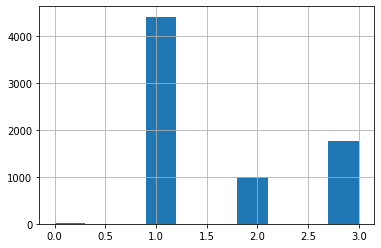

In [ ]:
#target variable
df['IE'].hist()
df['IE'].value_counts()

Most people taking this test identify as introverted.

2    4175
1    2718
3     200
0      94
Name: gender, dtype: int64

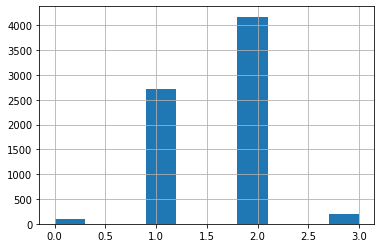

In [ ]:
df['gender'].hist()
df['gender'].value_counts()

Most people taking this test are female.

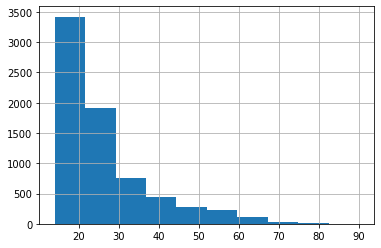

In [ ]:
df['age'].hist()

Most people taking this test are in their 20's and early 30's.

1    4952
2    2219
0      16
Name: engnat, dtype: int64

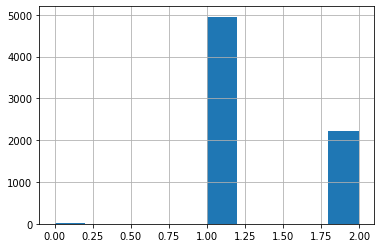

In [ ]:
df['engnat'].hist()
df['engnat'].value_counts()

Most people taking this test are native english speakers.

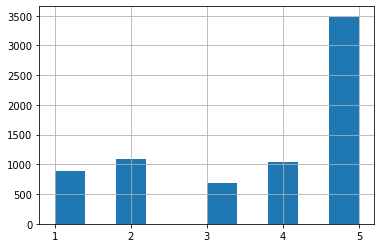

In [ ]:
df['Q1A'].hist()
df['Q1A'].value_counts()
plt.xticks(range(1,6));

## Multivariate Exploratory Visuals

### Correlational Heatmap

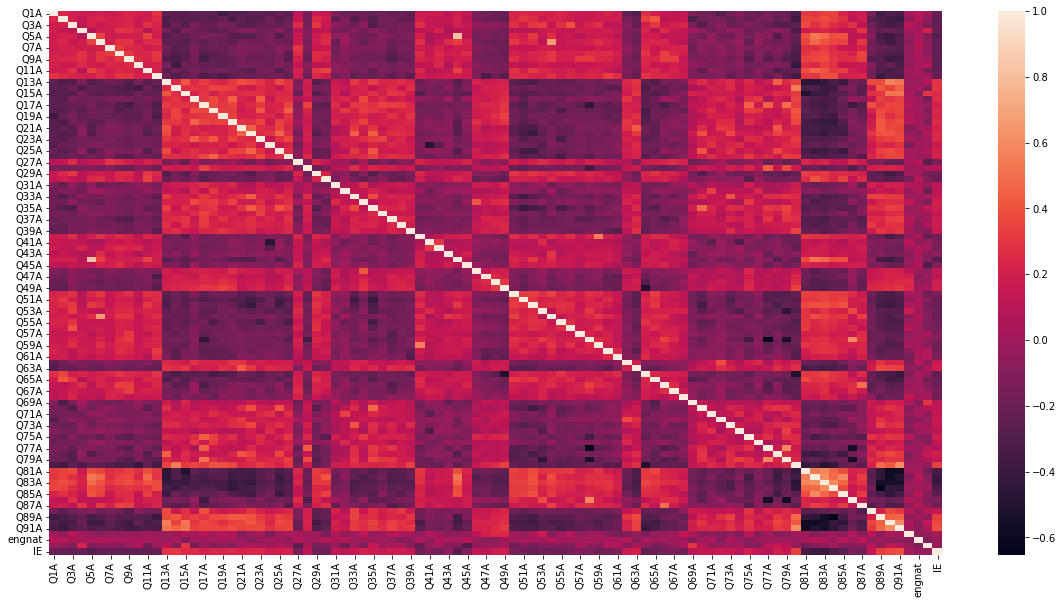

In [ ]:
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr)

This heatmap shows that there is a lot of multicollinearity among the questions. One of them is question 44 and question 5. Another is question 44 and question 6. Both have higher correlations, and many others have moderate.

By looking at the bottom row, we can see that there may be some mild to moderate correlations between the target variable (IE) and the questions. It seems that questions 13-26 have the highest correlations to 'IE', along with  questions 31-39, 47-49, 80, and 89-91.

In [ ]:
#Dataframe of important features after looking for the strongest correlations
strong_feats = df[['Q13A','Q14A','Q15A','Q81A','Q82A','Q83A','Q84A','Q85A',
                   'Q89A','Q90A','Q91A','IE']]
strong_feats

,Q13A,Q14A,Q15A,Q81A,Q82A,Q83A,Q84A,Q85A,Q89A,Q90A,Q91A,IE
0,3,5,1,2,1,3,2,1,4,3,3,3
1,3,3,2,2,1,2,2,2,4,4,3,2
2,4,1,1,5,5,5,5,5,2,1,1,1
3,2,1,1,5,5,5,5,5,4,3,3,1
4,5,2,1,3,2,3,1,1,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7183,4,2,4,5,4,3,5,3,2,5,4,1
7184,3,3,1,5,3,3,5,4,1,3,2,1
7185,2,1,1,5,5,5,5,5,1,1,1,1
7186,2,1,1,5,5,4,5,1,4,5,2,1


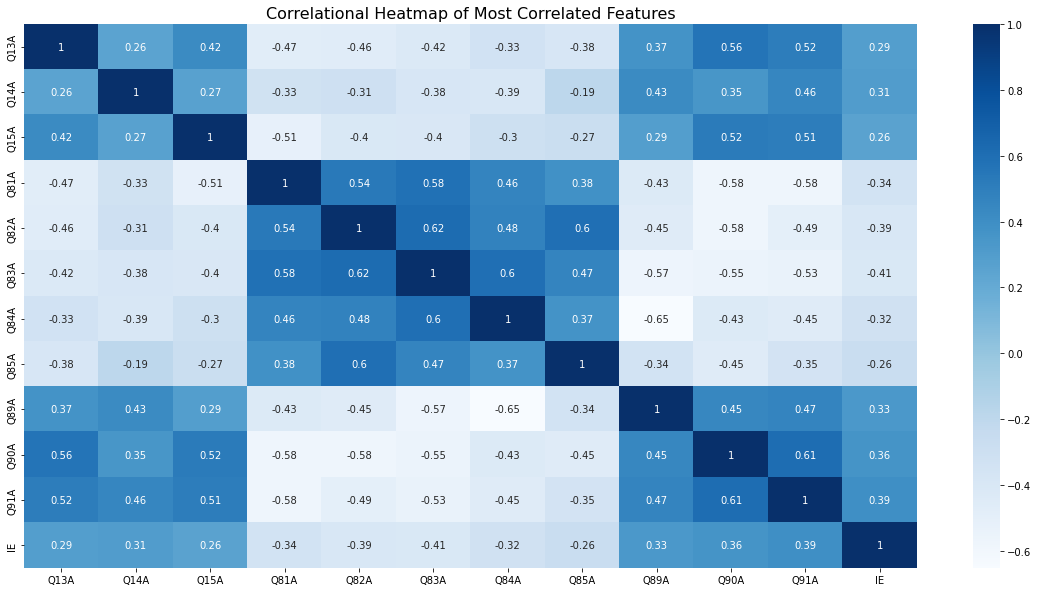

In [ ]:
#easier to read correlational heatmap of the strongest features
strong_corr = strong_feats.corr()
plt.figure(figsize = (20,10))
sns.heatmap(strong_corr, cmap='Blues', annot=True)
plt.title('Correlational Heatmap of Most Correlated Features', fontsize =16);

### Analysis of Heatmap

- In looking at this heatmap, positive correlations mean that as the person agrees more with the statement (higher rating) they also tend identify as extroverted (higher number compared to introverted). If they disagree (lower rating), they tend to be introverted (lower number).
- Negative correlations mean that the more they agree with the statement they also tend to be introverted. If they disagree, they tend to be extroverted. Basically, it is an inverse relationship.

#### Positive Correlations

After trying to select the specific values that seemed to have the strongest correlations, we can see that Q91 ("I talk to a lot of different people at parties") has the strongest positive correlation to IE. The next strongest positive correlations are followed by Q90 ("I start conversations") and Q89 ("I don't mind being the center of attention"), respectively. With some general knowledge about introverts and extraverts, it makes sense that these questions have the strongest positive correlations towards our target because extroverts typically enjoy, or are much more comfortable with social activities with strangers compared to introverts.

It is interesting to note that these questions also have strong positive correlations between each other, which shows that people who agree with one are likely to agree with the others if they are extroverted, or disagree if they are introverted.

#### Negative Correlations

The questions with the highest negative correlations to our target are Q83 ("I keep in the background"), Q82 ("I don&#39;t talk a lot"), and Q81 ("I am quiet around strangers"), respectively. These questions make sense to have negative correlations because introverts are typically enjoy their time alone and may dislike social activities around new people, which is represented well by these questions. Similarly, these questions are also strongly positively correlated between each other, which mean they also have consistent answers.



In [ ]:
#replacing numeric values with labels for easier data exploration
#adding 0 values to the 'Neither section because they are similar enough
df['IE'] = df['IE'].replace({1:'Introvert', 2:'Extrovert',
                             3:'Neither', 0:'Neither'})

### Violin Plots for Each Question Relating to IE

In [ ]:
df.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'Q43A', 'Q44A', 'Q45A', 'Q46A',
       'Q47A', 'Q48A', 'Q49A', 'Q50A', 'Q51A', 'Q52A', 'Q53A', 'Q54A', 'Q55A',
       'Q56A', 'Q57A', 'Q58A', 'Q59A', 'Q60A', 'Q61A', 'Q62A', 'Q63A', 'Q64A',
       'Q65A', 'Q66A', 'Q67A', 'Q68A', 'Q69A', 'Q70A', 'Q71A', 'Q72A', 'Q73A',
       'Q74A', 'Q75A', 'Q76A', 'Q77A', 'Q78A', 'Q79A', 'Q80A', 'Q81A', 'Q82A',
       'Q83A', 'Q84A', 'Q85A', 'Q86A', 'Q87A', 'Q88A', 'Q89A', 'Q90A', 'Q91A',
       'country', 'gender', 'engnat', 'age', 'IE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

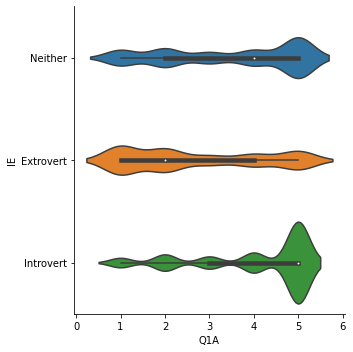

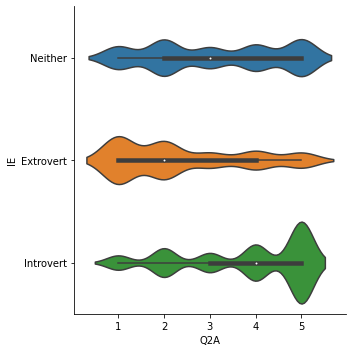

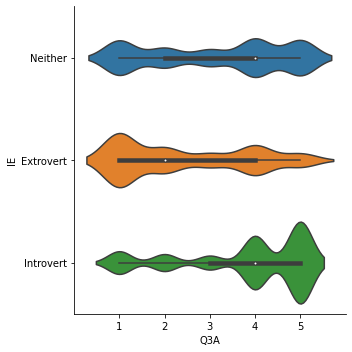

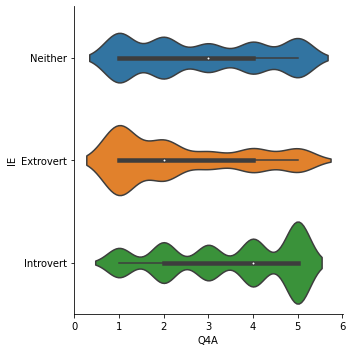

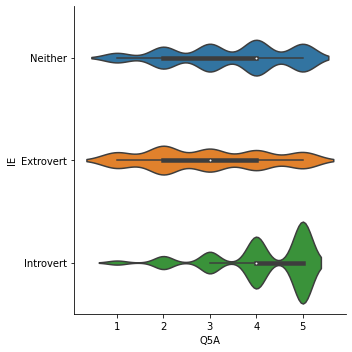

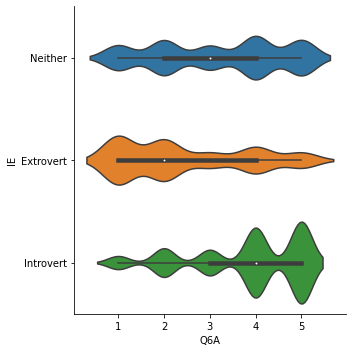

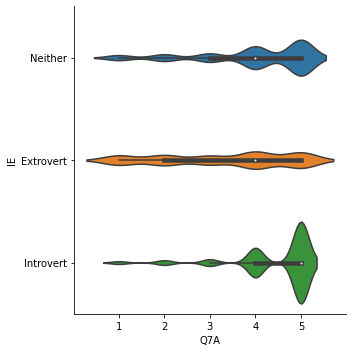

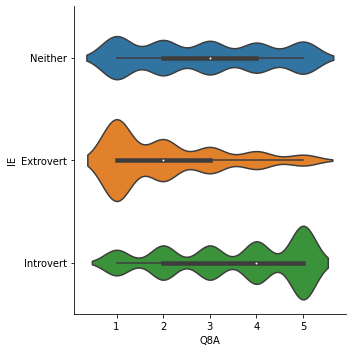

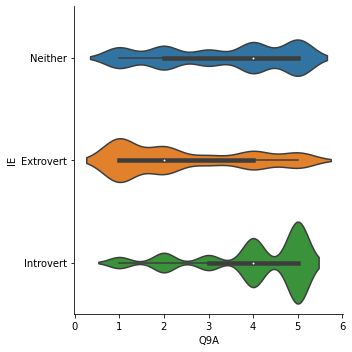

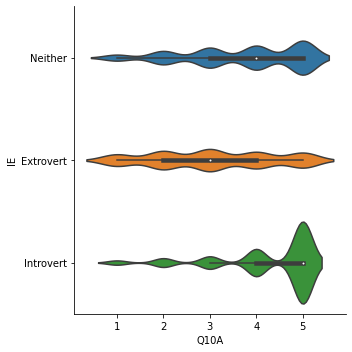

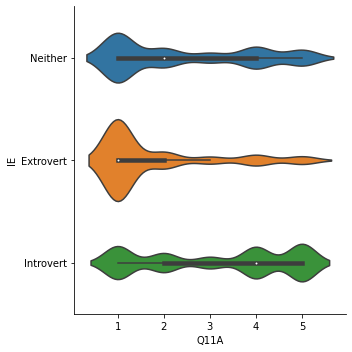

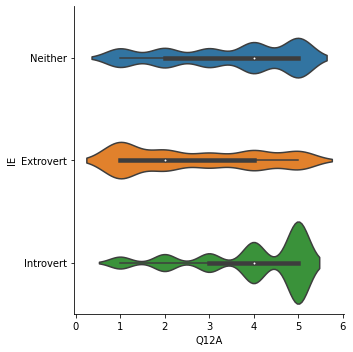

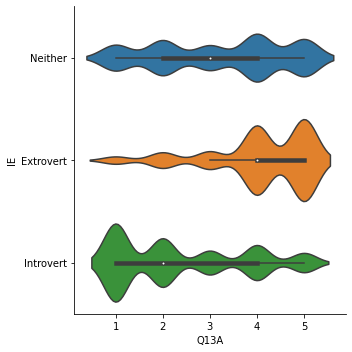

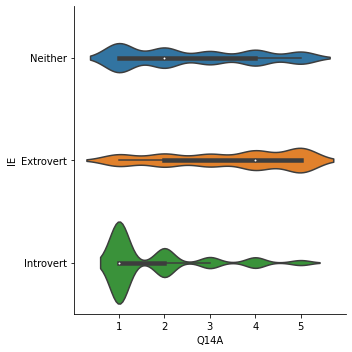

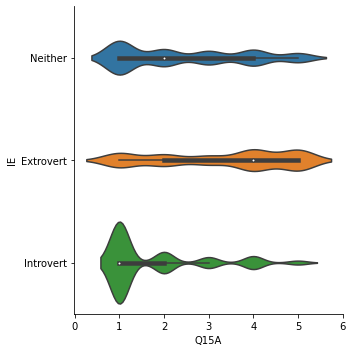

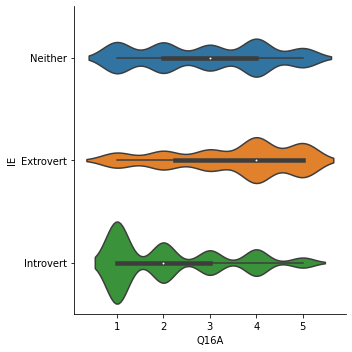

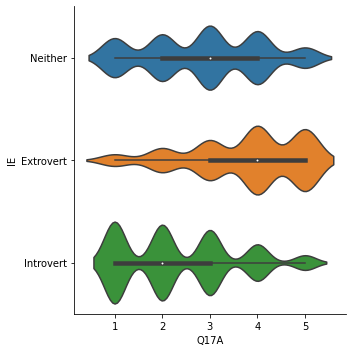

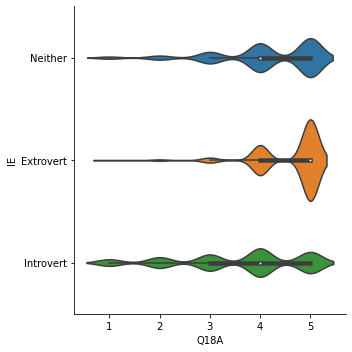

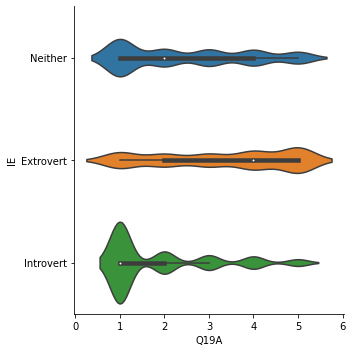

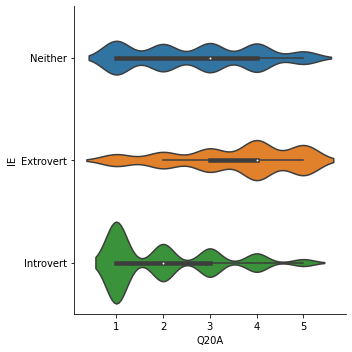

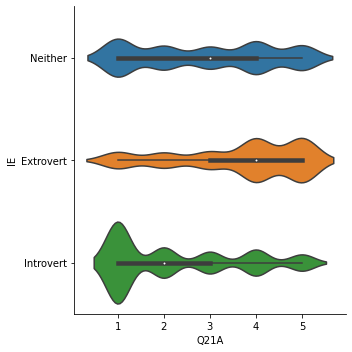

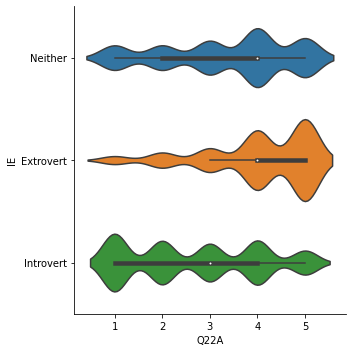

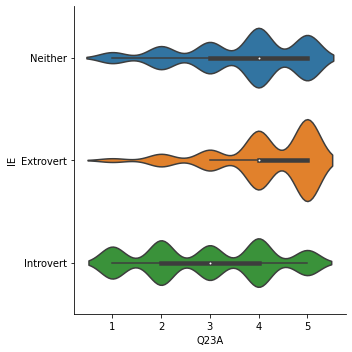

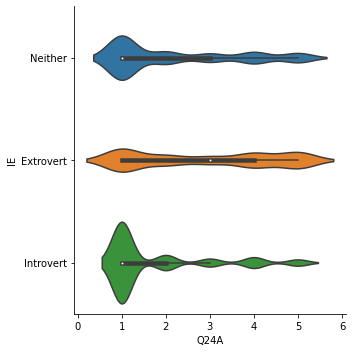

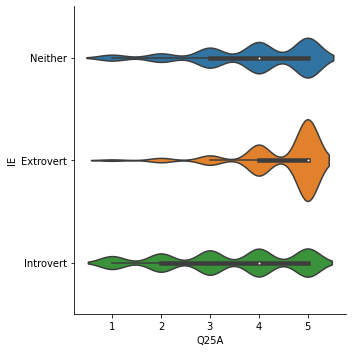

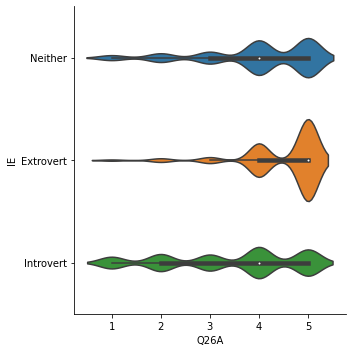

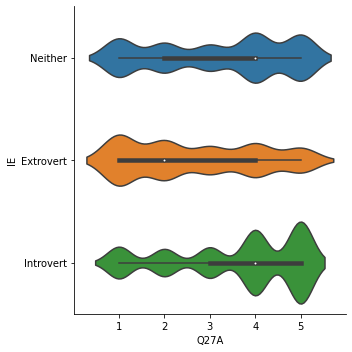

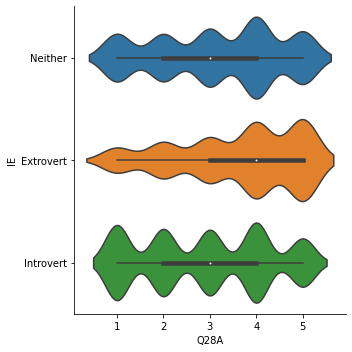

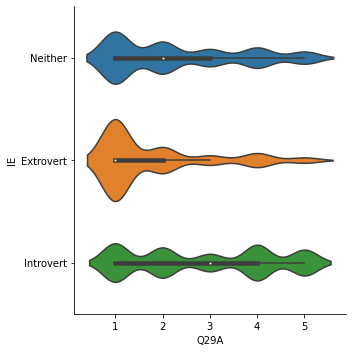

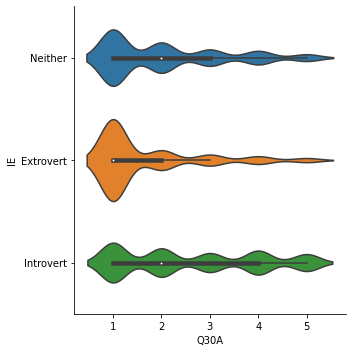

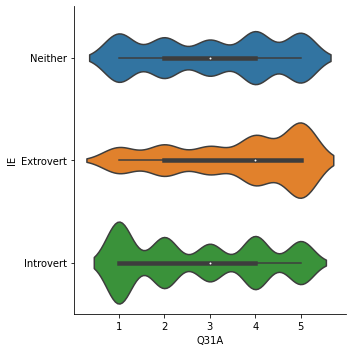

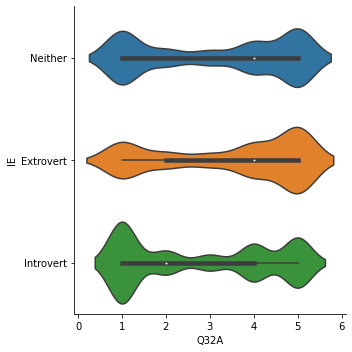

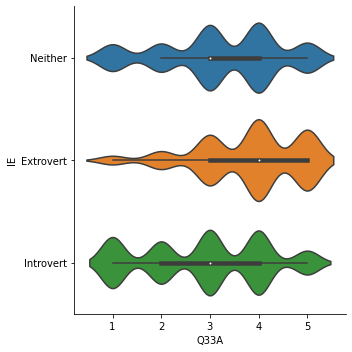

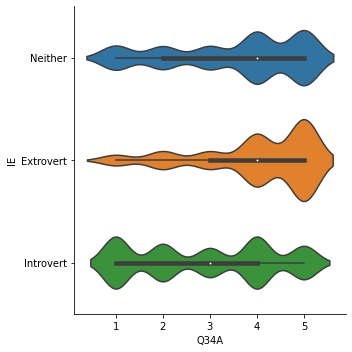

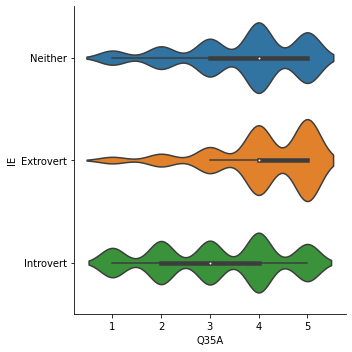

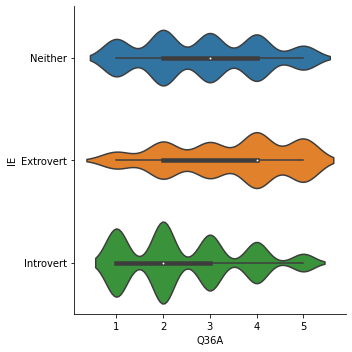

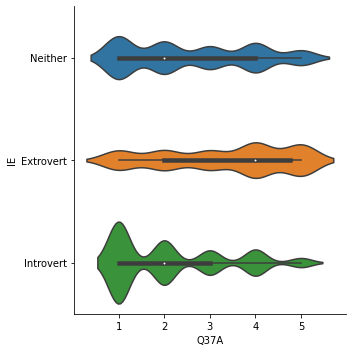

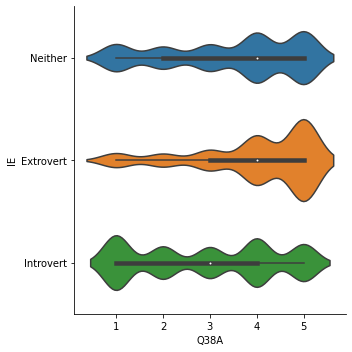

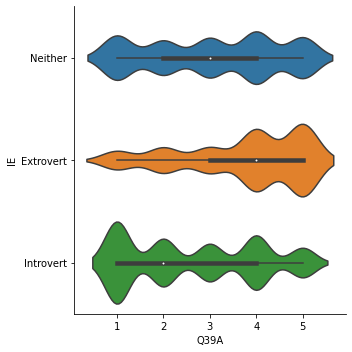

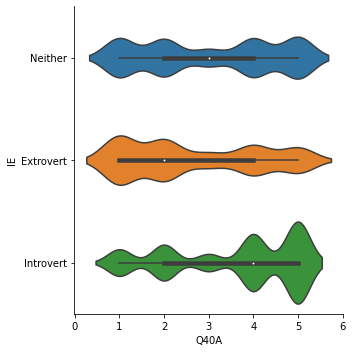

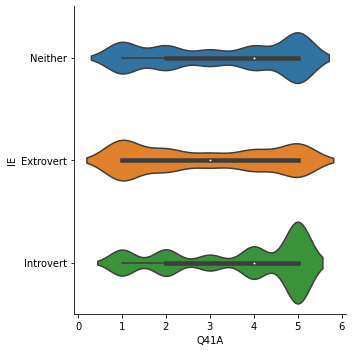

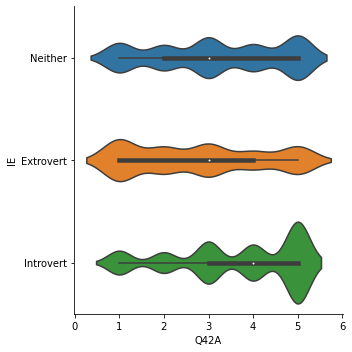

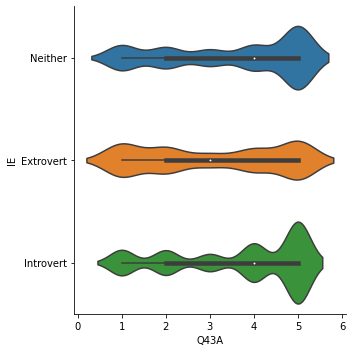

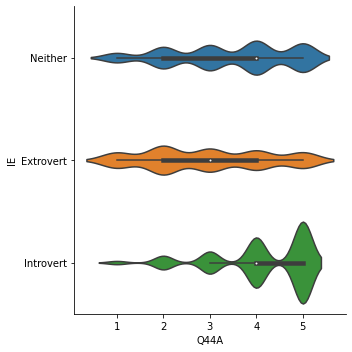

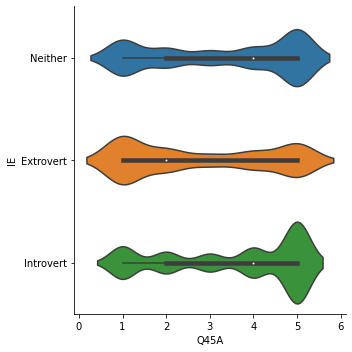

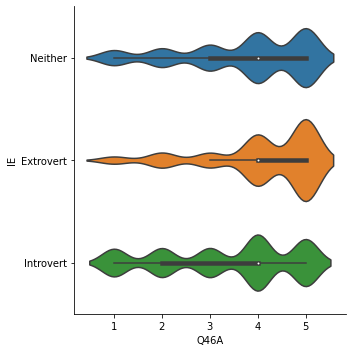

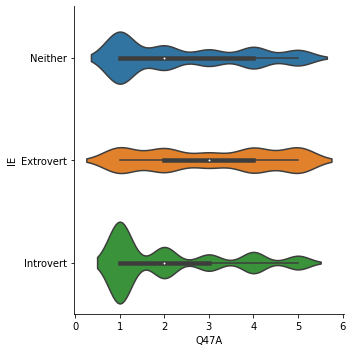

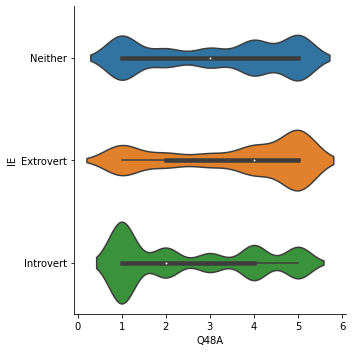

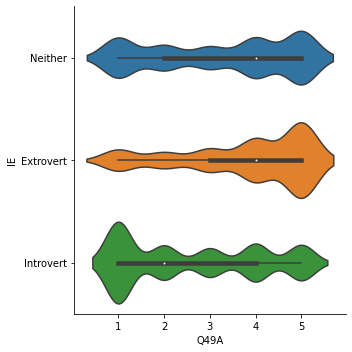

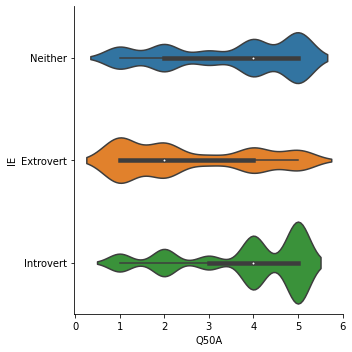

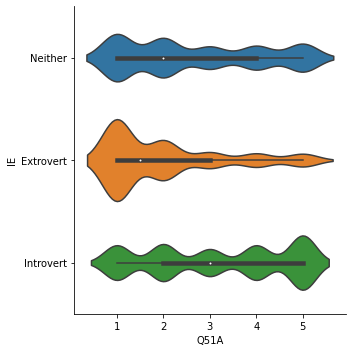

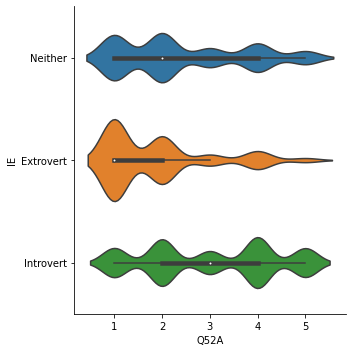

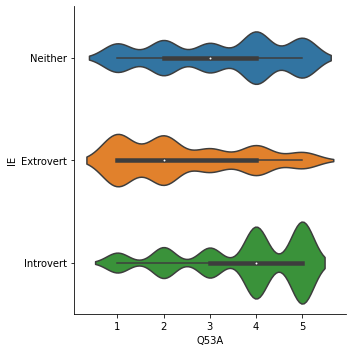

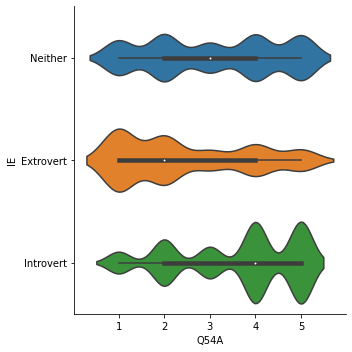

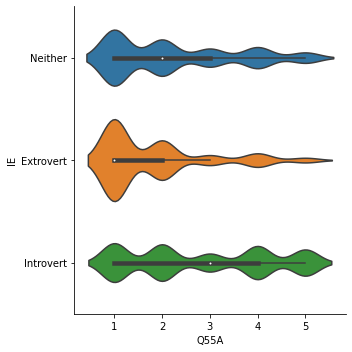

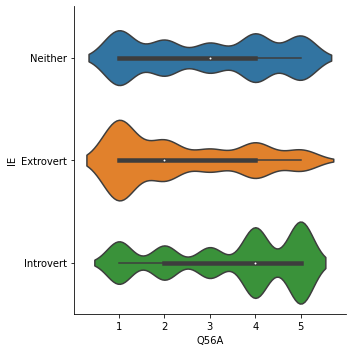

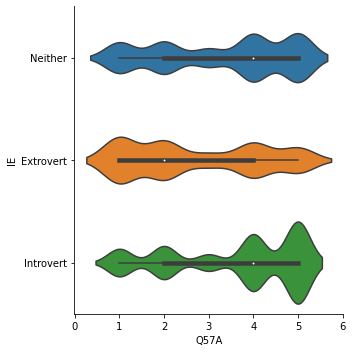

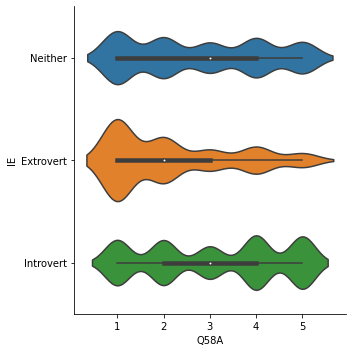

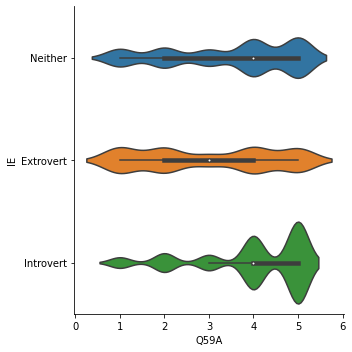

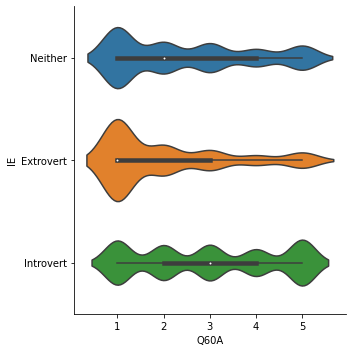

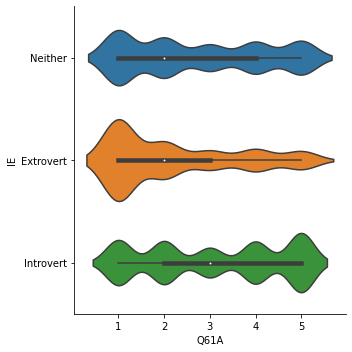

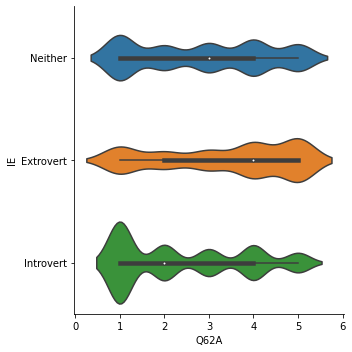

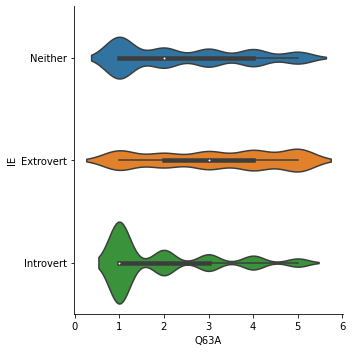

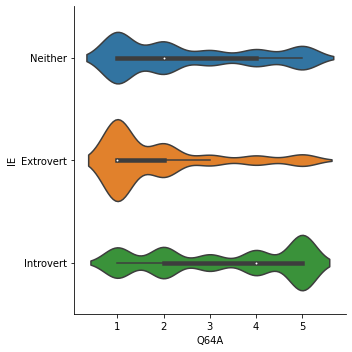

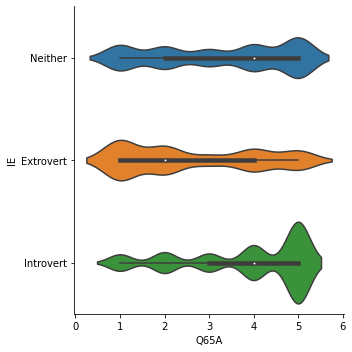

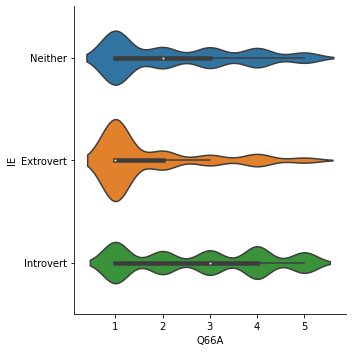

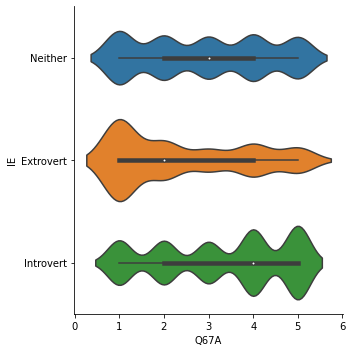

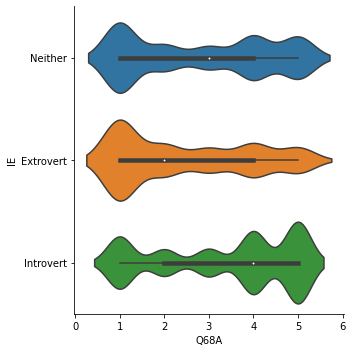

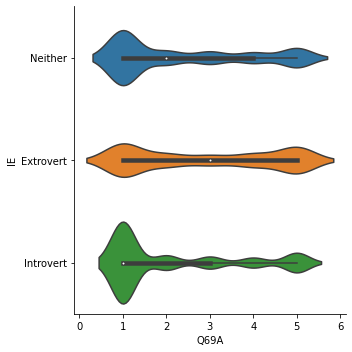

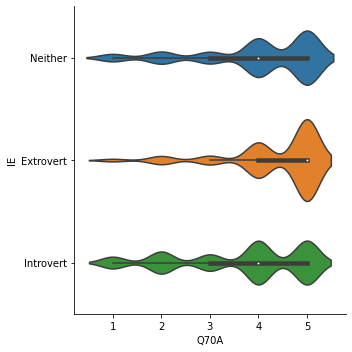

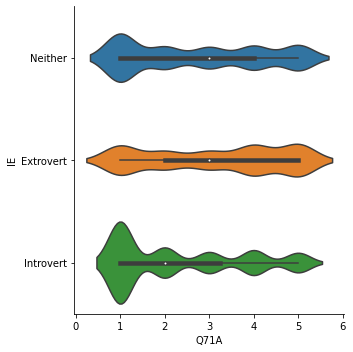

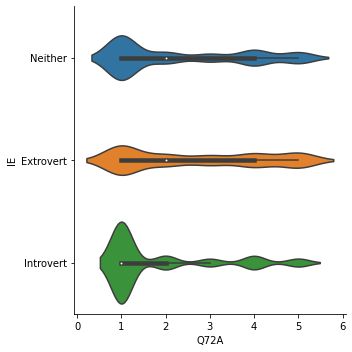

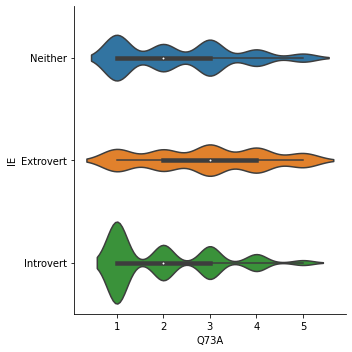

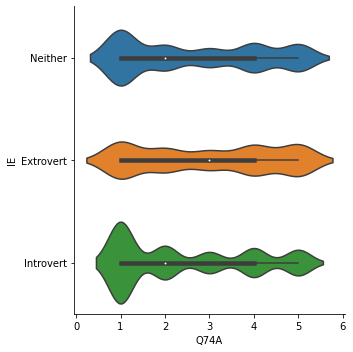

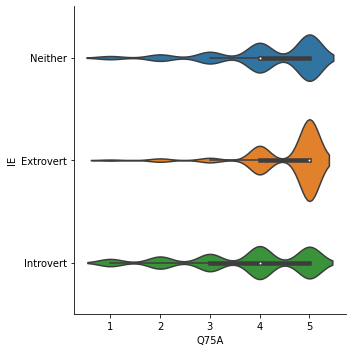

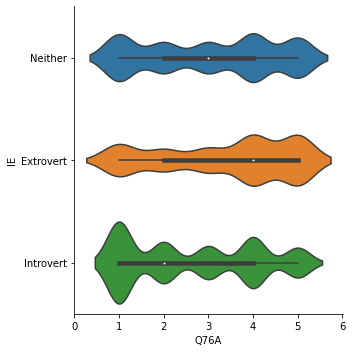

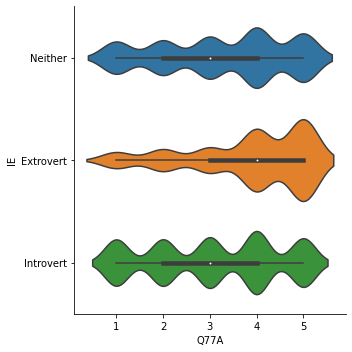

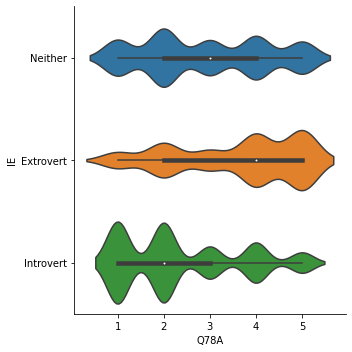

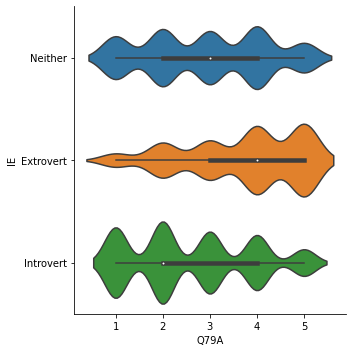

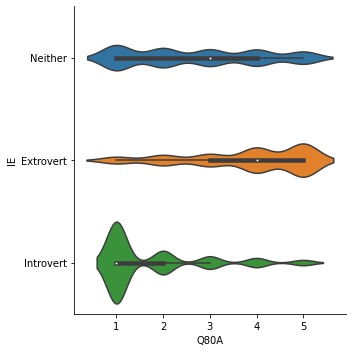

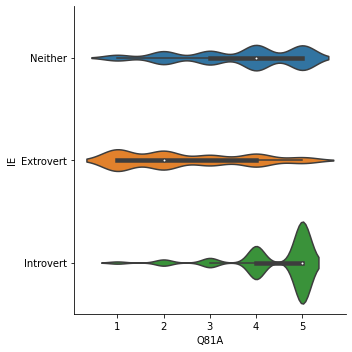

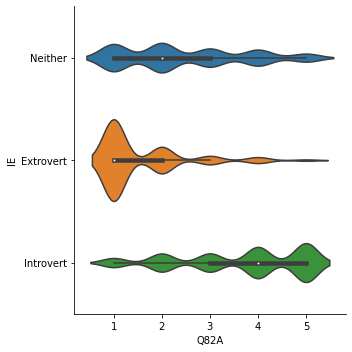

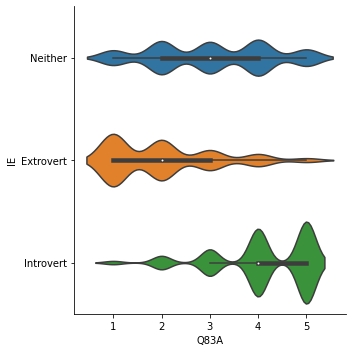

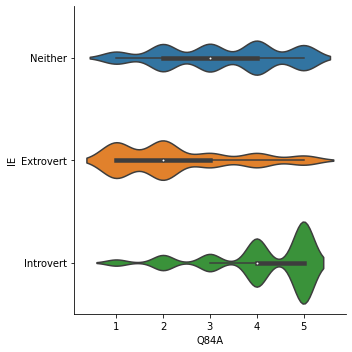

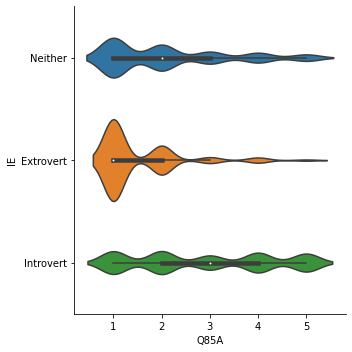

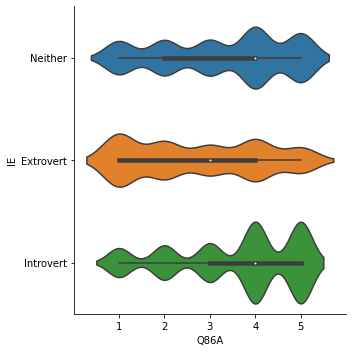

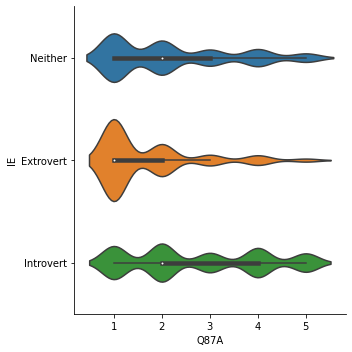

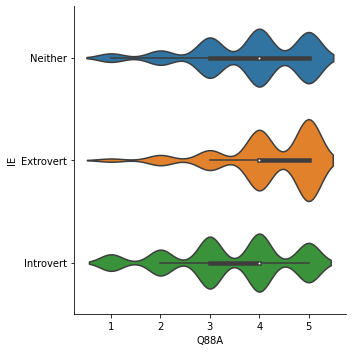

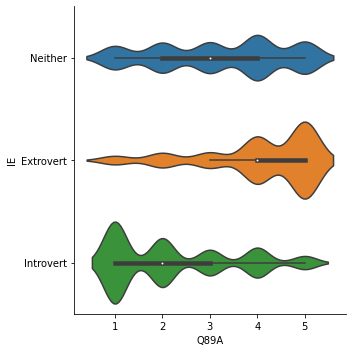

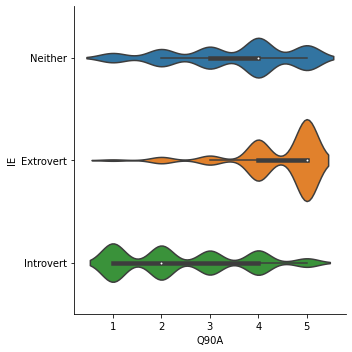

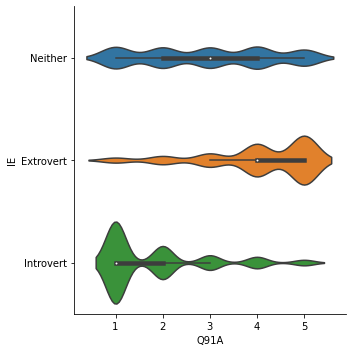

In [ ]:
numbers = range(1,92)
for num in numbers:
  sns.catplot(x=f"Q{num}A", y="IE",kind='violin', data=df);

### Violin Plots for Other Categorical Variables

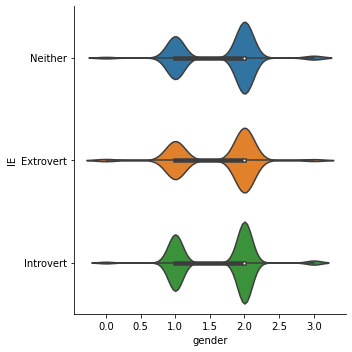

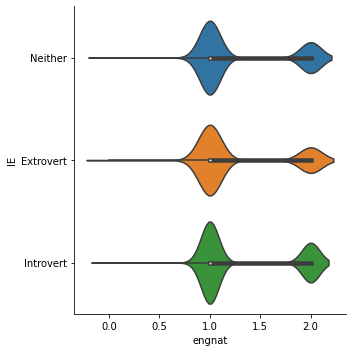

In [ ]:
sns.catplot(x=f"gender", y="IE",kind='violin', data=df)
sns.catplot(x=f"engnat", y="IE",kind='violin', data=df)

### Boxplot of IE and AGE

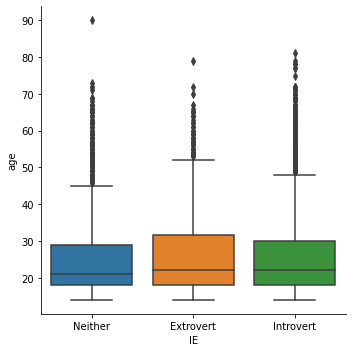

In [ ]:
sns.catplot(x="IE", y="age",kind='box', data=df)

# 2 Main Visuals

It seems that questions 13-26 have the highest correlations to 'IE', along with  questions 31-39, 47-49, 80, and 89-91.

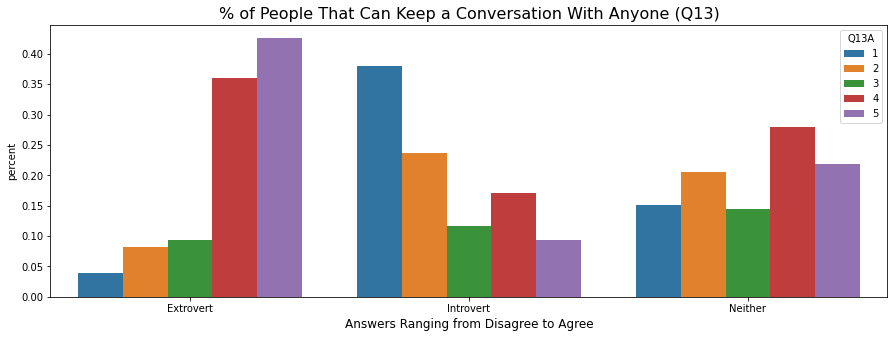

In [ ]:
#normalizing values to avoid skewing the bar chart
grouped = df.groupby(['IE'])['Q13A']
grouped = grouped.value_counts(normalize=True).rename('percent').reset_index()

#plotting graph of Q13A counts with IE
fig, ax = plt.subplots(1,1, figsize=(15,5))

sns.barplot(data=grouped, x='IE', y='percent', hue='Q13A')
ax.set_title('% of People That Can Keep a Conversation With Anyone (Q13)',fontsize =16)
ax.set_xlabel('Answers Ranging from Disagree to Agree', fontsize=12)
plt.show()

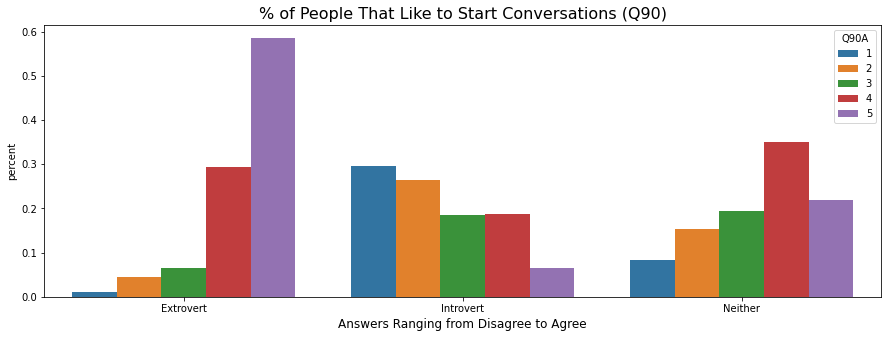

In [ ]:
#normalizing values to avoid skewing the bar chart
grouped = df.groupby(['IE'])['Q90A']
grouped = grouped.value_counts(normalize=True).rename('percent').reset_index()

#plotting graph of Q13A counts with IE
fig, ax2 = plt.subplots(1,1, figsize=(15,5))

sns.barplot(data=grouped, x='IE', y='percent', hue='Q90A')
ax2.set_title('% of People That Like to Start Conversations (Q90)', fontsize =16)
ax2.set_xlabel('Answers Ranging from Disagree to Agree', fontsize=12)
plt.show()

Analysis of Visuals:

Both of these barplots show that people who identify as introverted typically seem to either dislike or avoid starting or continuing conversations, especially with people they do not know. 

The answers to these questions are also highly correlated to other questions regarding situations where the individual would be around talkative people, such as at parties. Across all of these types of questions, those who identify as introverts tend to not be as talkative as those who identify as extroverted. 

Using these questions to give a quick idea on whether or not someone is an introvert or extrovert could be extremely useful for someone who is trying to market towards introverts or extroverts specifically through having more information on how these types of people are.

It is also worth mentioning that those who identify as "Neither" (which could be described as an ambivert, or someone who is in between introverted and extroverted) answered fairly evenly across the board, as expected.

# Preprocessing for Machine Learning

In [ ]:
#dropping columns that are not meant for predictions (all questions asked after
#main question sequence except for 'IE')
df2 = df.drop(columns= ['gender','engnat','age','country'])
df2.head(2)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,IE
0,5,3,1,2,3,2,3,3,4,5,1,5,3,5,1,3,3,4,1,4,1,3,5,1,4,5,5,4,1,2,2,2,4,5,4,2,1,1,5,2,5,4,5,5,1,5,2,4,5,3,1,1,5,3,1,4,4,5,2,4,1,2,2,1,3,1,4,1,1,5,1,5,3,2,5,5,3,5,3,4,2,1,3,2,1,4,2,5,4,3,3,Neither
1,5,5,1,5,2,2,5,2,1,3,2,2,3,3,2,2,4,5,2,2,4,4,3,5,5,5,1,5,2,2,3,5,2,2,4,5,4,4,3,3,1,3,4,1,1,4,2,2,4,2,2,1,1,1,3,1,2,1,3,1,1,4,5,1,5,1,1,1,1,5,1,5,3,2,5,2,4,2,5,4,2,1,2,2,2,1,3,4,4,4,3,Extrovert


In [ ]:
#Changing values back to ordinal encoding for machine learning
df2['IE'] = df['IE'].replace({'Introvert':1, 'Extrovert':2, 'Neither':3})

In [ ]:
#separating target variable and train, test, splitting
X = df2.drop(['IE'], axis=1)
y = df2['IE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- Since all the predictive data is already ordinal encoded, the only preprocessing step is to normalize the data.

- The data does not need an imputer either as all questions must be answered to submit the questionnaire.

In [ ]:
#Instantiating Normalizer
normalizer = Normalizer()

#Normalizing our data to use in models
normalizer.fit(X_train)

#Transforming Data
X_train_processed = normalizer.transform(X_train)
X_test_processed = normalizer.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (5390, 91)


# Machine Learning Models

## Decision Tree Classifier

In [ ]:
#instantiating decision tree and creating a param_grid for grid search
dec_tree = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

dt_grid_search = GridSearchCV(dec_tree, param_grid)

#fitting grid search
dt_grid_search.fit(X_train_processed, y_train)

#checking best parameters
dt_grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
#retrieve the best version of the model
best_dt_model = dt_grid_search.best_estimator_

#refit the model on the whole training set and make predictions
best_dt_model.fit(X_train_processed, y_train)
best_dt_preds = best_dt_model.predict(X_test_processed)
#score the model on the test set
print(best_dt_model.score(X_train_processed, y_train))
best_dt_model.score(X_test_processed, y_test)

0.6981447124304268


0.7084028937117418

In [ ]:
#Trying different values in param grid and checking best params
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

dt_grid_search2 = GridSearchCV(dec_tree, param_grid2)
dt_grid_search2.fit(X_train_processed, y_train)
dt_grid_search2.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
#retrieve the best version of the model
best_dt_model2 = dt_grid_search2.best_estimator_

#refit the model on the whole training set and make predictions
best_dt_model2.fit(X_train_processed, y_train)
best_dt2_preds = best_dt_model2.predict(X_test_processed)
#score the model on the train and test set
print(best_dt_model2.score(X_train_processed, y_train))
best_dt_model2.score(X_test_processed, y_test)

0.6981447124304268


0.7084028937117418

**Both decision trees had the same exact predictions, so I will use the first model for future comparisons.**

### Final  Decision Tree Model

In [ ]:
#Classification Report
labels=['Introvert','Extrovert','Neither']
print(classification_report(y_test, best_dt_preds, target_names=labels))

              precision    recall  f1-score   support

   Introvert       0.77      0.92      0.84      1131
   Extrovert       0.65      0.50      0.56       224
     Neither       0.45      0.26      0.33       442

    accuracy                           0.71      1797
   macro avg       0.62      0.56      0.58      1797
weighted avg       0.67      0.71      0.68      1797



## KNN Model


In [ ]:
#instantiating model
knn = KNeighborsClassifier()

#fitting the base model
knn.fit(X_train_processed, y_train)

#evaluation of base model
print(knn.score(X_train_processed, y_train))
print(knn.score(X_test_processed, y_test))

0.7775510204081633
0.7161936560934892


Minimum error:- 0.2637729549248748 at K = 37


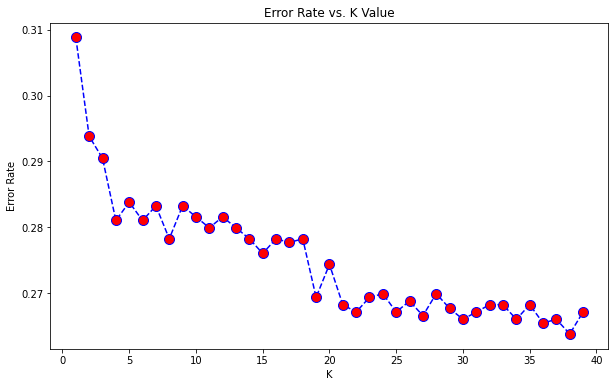

In [ ]:
#Tuning the Model

#code derived from https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers
#to find lowest error rate

error_rate = []
for i in range(1,40):
 knn2 = KNeighborsClassifier(n_neighbors=i)
 knn2.fit(X_train_processed ,y_train)
 pred_i = knn2.predict(X_test_processed)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7362270450751253 at K = 37


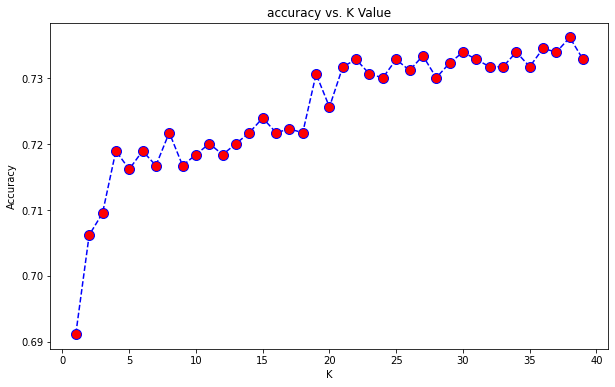

In [ ]:
#code derived from https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers
#to find highest accuracy

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_processed,y_train)
    yhat = neigh.predict(X_test_processed)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

**Based on these two graphs, the K value that provides the highest accuracy and lowest error rate is K = 37.**

### Final KNN Model

In [ ]:
#Instantiating the best KNN model
best_knn = KNeighborsClassifier(n_neighbors = 37)

#fit
best_knn.fit(X_train_processed, y_train)

#predictions
best_knn_preds = best_knn.predict(X_test_processed)

#evaluate
print(best_knn.score(X_train_processed, y_train))
best_knn.score(X_test_processed, y_test)

0.7315398886827458


0.7340011129660545

In [ ]:
#KNN Classification Report
print(classification_report(y_test, best_knn_preds, target_names=labels))

              precision    recall  f1-score   support

   Introvert       0.79      0.94      0.86      1131
   Extrovert       0.60      0.71      0.65       224
     Neither       0.51      0.22      0.31       442

    accuracy                           0.73      1797
   macro avg       0.63      0.62      0.61      1797
weighted avg       0.70      0.73      0.70      1797



The KNN model produced the highest accuracy so far.

## Logistic Regression Model

In [ ]:
#instantiating model
logreg = LogisticRegression(max_iter=1000)

#fitting model
logreg.fit(X_train_processed, y_train)

#checking scores
print(logreg.score(X_train_processed, y_train))
print(logreg.score(X_test_processed, y_test))

0.7493506493506493
0.7479131886477463


### Tuning for C with other base parameters

{0.0001: 0.6293823038397329,
 0.001: 0.6293823038397329,
 0.01: 0.6299387868670006,
 0.1: 0.7395659432387313,
 1: 0.7479131886477463,
 10: 0.7440178074568725,
 100: 0.7490261547022816,
 1000: 0.7495826377295493}

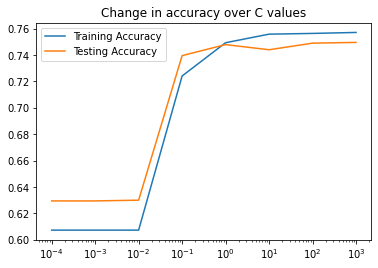

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data.
  logreg = LogisticRegression(C=c, max_iter=1000)
  logreg.fit(X_train_processed, y_train)

  # add the training and testing scores to lists
  train_scores.append(logreg.score(X_train_processed, y_train))
  test_scores.append(logreg.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

### Tuning for C Values with L1 Regularization

{0.0001: 0.6293823038397329,
 0.001: 0.6293823038397329,
 0.01: 0.6293823038397329,
 0.1: 0.7161936560934892,
 1: 0.7462437395659433,
 10: 0.7429048414023373,
 100: 0.7445742904841403,
 1000: 0.7445742904841403}

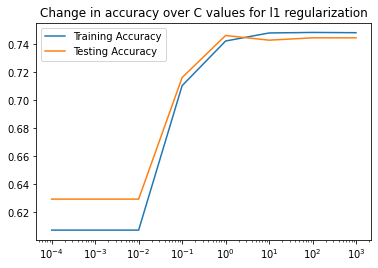

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data.
  #also switched solver='liblinear' because the default solver can't do L1 regularization
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg.fit(X_train_processed, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(logreg.score(X_train_processed, y_train))
  test_scores.append(logreg.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6293823038397329,
 0.001: 0.6293823038397329,
 0.01: 0.6293823038397329,
 0.1: 0.7223149693934335,
 1: 0.7468002225932109,
 10: 0.7440178074568725,
 100: 0.7440178074568725,
 1000: 0.7440178074568725}

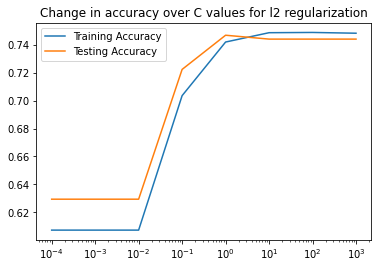

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data.
  #also switched solver='liblinear' because the default solver can't do L1 regularization
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg.fit(X_train_processed, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(logreg.score(X_train_processed, y_train))
  test_scores.append(logreg.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

**Out of the logistic regression models, the base model with a C value of 100 gave the best results.**

### Final Logistic Regression Model

In [ ]:
#Instantiating best logreg model
best_logreg = LogisticRegression(C=100, max_iter=1000)

#Fit to data
best_logreg.fit(X_train_processed, y_train)

#predictions
best_logreg_train_preds = best_logreg.predict(X_train_processed)
best_logreg_preds = best_logreg.predict(X_test_processed)

#evaluate
print(best_logreg.score(X_train_processed, y_train))
best_logreg.score(X_test_processed, y_test)

0.7564007421150278


0.7490261547022816

In [ ]:
#KNN Classification Report
print(classification_report(y_test, best_logreg_preds, target_names=labels))

              precision    recall  f1-score   support

   Introvert       0.82      0.90      0.86      1131
   Extrovert       0.68      0.71      0.70       224
     Neither       0.53      0.39      0.45       442

    accuracy                           0.75      1797
   macro avg       0.68      0.67      0.67      1797
weighted avg       0.73      0.75      0.74      1797



# Testing Each Model After Using PCA

In [ ]:
X_train_processed.shape

(5390, 91)

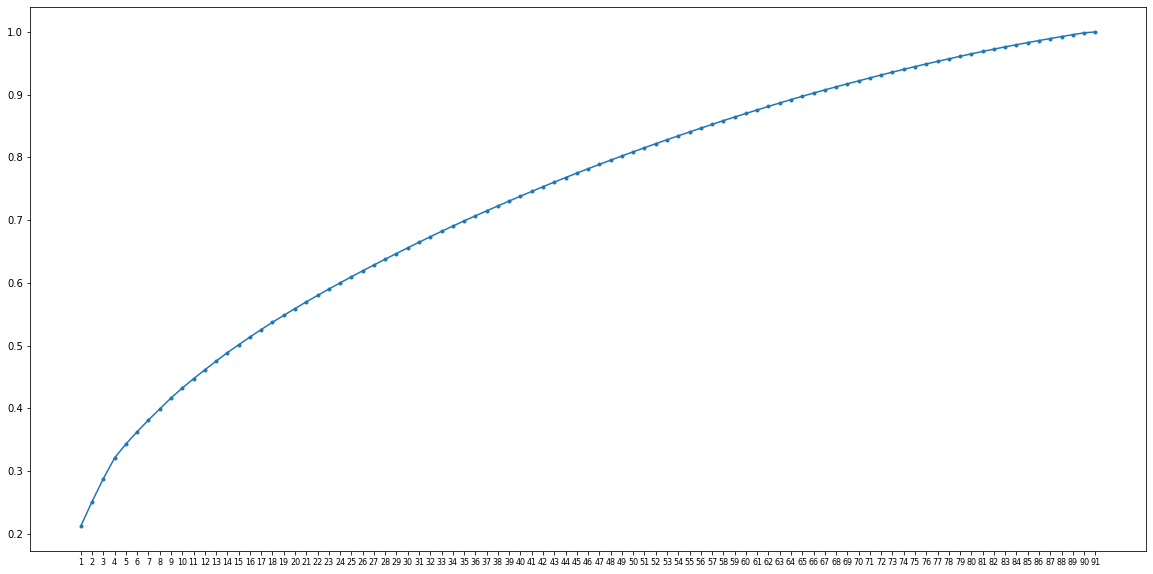

In [ ]:
#Instantiating PCA
pca = PCA(random_state=42)

#fitting to processed data
pca.fit(X_train_processed)

#transforming training and testing data
X_train_pca = pca.transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

#Screen plot to visualize variance with number of components
fig, ax3 = plt.subplots(1,1, figsize=(20,10))
plt.plot(range(1,92), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,92), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

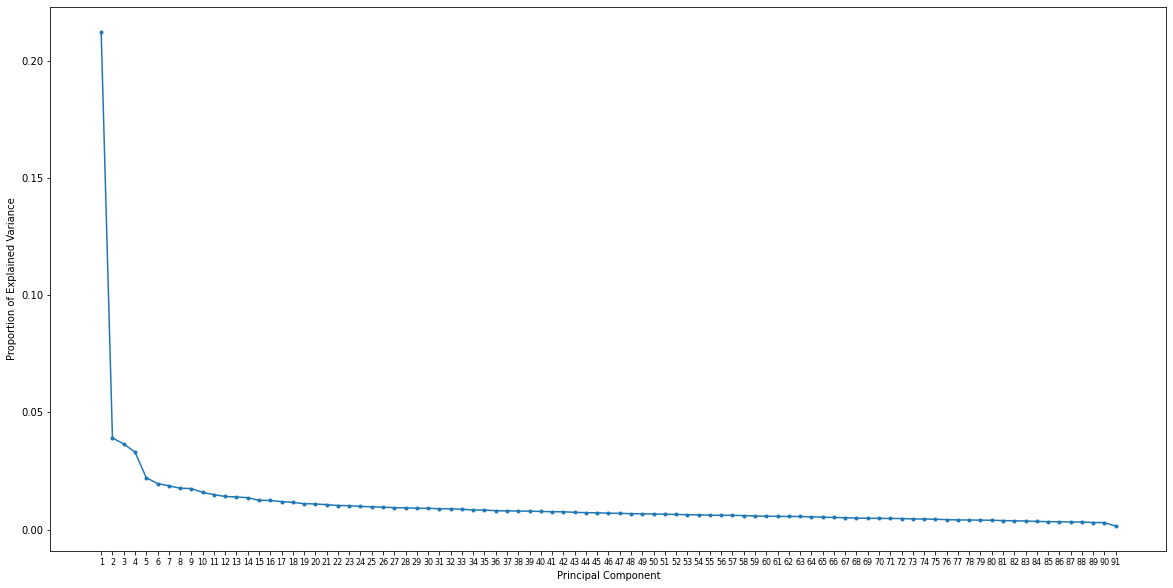

In [ ]:
# Scree Plot for explained variance ratios of the first 91 principal components
fig, ax3 = plt.subplots(1,1, figsize=(20,10))
plt.plot(range(1, 92), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 92), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Using the elbow method, a total of 6 components should be kept for analysis.

## Decision Tree With PCA

In [ ]:
#Instantiating best pca
pca6 = PCA(n_components=6,random_state=42)

#pipeline with pca and decision tree
dec_tree_pipe = make_pipeline(pca6, best_dt_model2)

#fitting
dec_tree_pipe.fit(X_train_pca, y_train)

#Evaluation
print('Training accuracy:', dec_tree_pipe.score(X_train_pca, y_train))
print('Testing accuracy:', dec_tree_pipe.score(X_test_pca, y_test))

Training accuracy: 0.7150278293135436
Testing accuracy: 0.7184195882025598


In [ ]:
print(best_dt_model.score(X_train_processed, y_train))
best_dt_model.score(X_test_processed, y_test)

0.6981447124304268


0.7084028937117418

PCA provided a slight accuracy boost.

## KNN Model With PCA

In [ ]:
#making a copy of the best knn model for comparison
best_knn2 = KNeighborsClassifier(n_neighbors = 37)

#pipeline with pca and decision tree
knn_pipe = make_pipeline(pca6, best_knn2)

#fitting
knn_pipe.fit(X_train_pca, y_train)

#predict
knn_pipe_preds = knn_pipe.predict(X_test_pca)

#Evaluation
print('Training accuracy:', knn_pipe.score(X_train_pca, y_train))
print('Testing accuracy:', knn_pipe.score(X_test_pca, y_test))
best_knn.score(X_test_processed, y_test)

Training accuracy: 0.7452690166975882
Testing accuracy: 0.7434613244296049


0.7340011129660545

PCA lowered the scores for the KNN model.

## LogReg Model With PCA

In [ ]:
#making a copy of the best logreg model for comparison
best_logreg2 = LogisticRegression(C=100, max_iter=1000)

#pipeline with pca and decision tree
logreg_pipe = make_pipeline(pca6, best_logreg2)

#fitting
logreg_pipe.fit(X_train_pca, y_train)

#Evaluation
print('Training accuracy:', logreg_pipe.score(X_train_pca, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test_pca, y_test))
best_logreg.score(X_test_processed, y_test)

Training accuracy: 0.7365491651205937
Testing accuracy: 0.7412353923205343


0.7490261547022816

In [ ]:
lr_pipe_preds = logreg_pipe.predict(X_test_pca)

PCA gave the same accuracy score as the original logreg model.

# Comparison of All Models

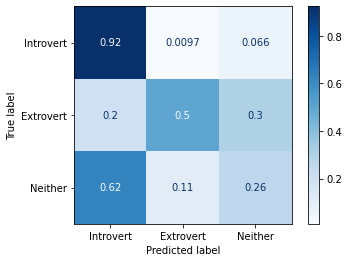

In [ ]:
#Confusion Matrix for Decision Tree Model
ConfusionMatrixDisplay.from_predictions(y_test, best_dt_preds,
                                        display_labels=labels,cmap='Blues',
                                        normalize='true');

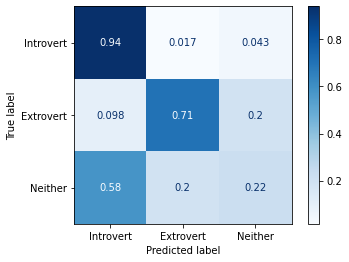

In [ ]:
#Confusion Matrix for KNN Model
ConfusionMatrixDisplay.from_predictions(y_test, best_knn_preds,
                                        display_labels=labels, cmap='Blues',
                                        normalize='true');

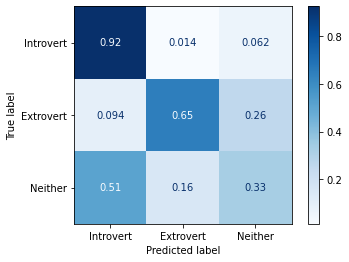

In [ ]:
#Confusion Matrix for KNN Model with PCA
ConfusionMatrixDisplay.from_predictions(y_test, knn_pipe_preds,
                                        display_labels=labels, cmap='Blues',
                                        normalize='true');

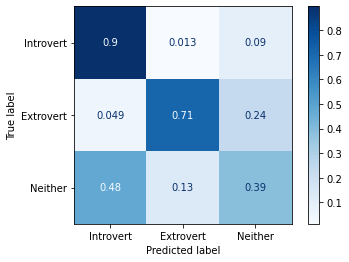

In [ ]:
#Confusion Matrix for LogReg Model
ConfusionMatrixDisplay.from_predictions(y_test, best_logreg_preds,
                                        display_labels=labels, cmap='Blues',
                                        normalize='true');

In [ ]:
#Classification Reports Compiled
print(f'Classification Report for Decision Tree:\n {classification_report(y_test, best_dt_preds, target_names=labels)}')
print('\n')
print(f'Classification Report for KNN:\n {classification_report(y_test, best_knn_preds, target_names=labels)}')
print('\n')
print(f'Classification Report for KNN with PCA:\n {classification_report(y_test, knn_pipe_preds, target_names=labels)}')
print('\n')
print(f'Classification Report for LogReg:\n {classification_report(y_test, best_logreg_preds, target_names=labels)}')

Classification Report for Decision Tree:
               precision    recall  f1-score   support

   Introvert       0.77      0.92      0.84      1131
   Extrovert       0.65      0.50      0.56       224
     Neither       0.45      0.26      0.33       442

    accuracy                           0.71      1797
   macro avg       0.62      0.56      0.58      1797
weighted avg       0.67      0.71      0.68      1797



Classification Report for KNN:
               precision    recall  f1-score   support

   Introvert       0.79      0.94      0.86      1131
   Extrovert       0.60      0.71      0.65       224
     Neither       0.51      0.22      0.31       442

    accuracy                           0.73      1797
   macro avg       0.63      0.62      0.61      1797
weighted avg       0.70      0.73      0.70      1797



Classification Report for KNN with PCA:
               precision    recall  f1-score   support

   Introvert       0.81      0.92      0.86      1131
   Extrove

## Production Model Choice
Based on these reports, the logistic regression model had the highest accuracy at roughly 75%, followed by the KNN model with PCA at 74%, then the KNN model without PCA and the decision tree model at 71%.

Of these models, I would consider the logistic regression model to be the best simply because it has the highest accuracy. While having false positives and negatives are not very important for this particular situation, having less false negatives is slightly better because (in the case of deciding how to market to a particular individual) false negatives mean we are missing opportunities to advertise to someone who would respond well to the targeted advertisement.

A false positive, on the other hand, means we might send an advertisement to someone who might not be as likely to care about it, but there is a chance they could still like the product.